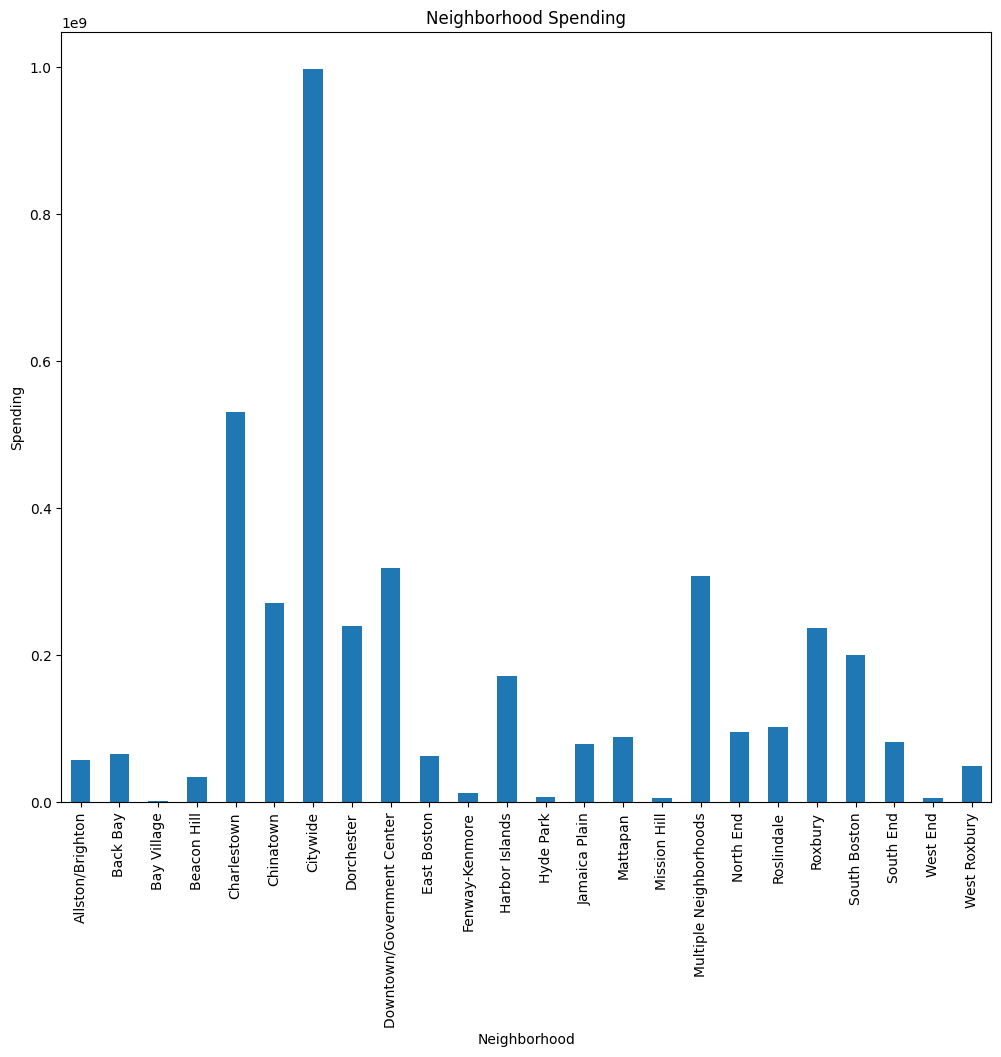

In [9]:
import pandas as pd
# Get neighborhood budget data
budget_data = pd.read_csv('fy24-capital-budget-plan-recommended.csv')

# Budget
budget_data['Total_Project_Budget'] = pd.to_numeric(
    budget_data['Total_Project_Budget'], errors='coerce')

# Neighborhood Spending
budget_by_neighborhood_data = budget_data.groupby('Neighborhood')['Total_Project_Budget'].sum()

ax = budget_data.groupby('Neighborhood')['Total_Project_Budget'].sum().plot.bar(
    xlabel='Neighborhood', ylabel='Spending', title='Neighborhood Spending', figsize=(12, 10))

In [10]:
# get list of neighborhoods
budget_by_neighborhood_data

Neighborhood
Allston/Brighton               57605000.0
Back Bay                       65442299.0
Bay Village                     1525000.0
Beacon Hill                    34410000.0
Charlestown                   531212390.0
Chinatown                     271272172.0
Citywide                      998192319.0
Dorchester                    239411239.0
Downtown/Government Center    318415000.0
East Boston                    62457890.0
Fenway-Kenmore                 12750000.0
Harbor Islands                171778144.0
Hyde Park                       6615000.0
Jamaica Plain                  78700000.0
Mattapan                       87935000.0
Mission Hill                    5242212.0
Multiple Neighborhoods        307874153.0
North End                      95445000.0
Roslindale                    102470000.0
Roxbury                       237308325.0
South Boston                  200249965.0
South End                      81465502.0
West End                        5000000.0
West Roxbury         

In [11]:
data = pd.read_csv('Climate_Ready_Boston_Social_Vulnerability.csv')

# categories to analyze
categories = ["TotDis", "Low_to_No", "LEP", "TotChild", "OlderAdult"]
# sum counts of people in each of the catoegires by Name (neighborhood)
social_by_neighborhood_data = data.groupby("Name")[categories].sum()
social_by_neighborhood_data



,TotDis,Low_to_No,LEP,TotChild,OlderAdult
Name,,,,,
Allston,400,3300,3444,173,144
Back Bay,1892,5316,9075,1686,3759
Bay Village,1122,3929,5640,1249,1711
Brighton,5502,17067,22914,4244,5847
Charlestown,1535,4157,5968,3301,1811
Dorchester,9819,22749,29284,17424,6535
East Boston,5180,13698,17845,8665,4147
Fenway,1240,6681,7177,453,496
Harbor Islands,179,349,361,0,12


In [12]:
# display dropped neighborhoods
print(set(budget_by_neighborhood_data.index.to_list()).difference(
    set(social_by_neighborhood_data.index.to_list())))

{'Allston/Brighton', 'Multiple Neighborhoods', 'Fenway-Kenmore', 'Citywide', 'Beacon Hill', 'Downtown/Government Center', 'Chinatown'}


In [13]:
# REFACTORING TO HAVE MATCHING NEIGHBORHOODS
# 1) remove Downtown/Government Center from budget
# 2) remove Chinatown from budget
# 3) remove Beacon Hill from budget
# 4) remove Multiple Neighborhoods from budget
# 5) remove Citywide from budget

# 5) Rename Fenway to Fenway-Kenmore in social
# 7) combine Allston and Brighton in social
# 8) combine South Boston Waterfront and South Boston in social
# 9) Remove Longwood Medical Area from social
# 10) Remove Leather District from social

budget_by_neighborhood_data = budget_by_neighborhood_data.drop(['Downtown/Government Center', 'Chinatown', 'Beacon Hill', 'Multiple Neighborhoods', 'Citywide'])

# combine fenway and kenmore rows into one row Fenway-Kenmore 
social_by_neighborhood_data.loc['Fenway-Kenmore'] = social_by_neighborhood_data.loc['Fenway']
social_by_neighborhood_data = social_by_neighborhood_data.drop(['Fenway'])

# combine Allston and Brighton rows into one row Allston-Brighton
social_by_neighborhood_data.loc['Allston/Brighton'] = social_by_neighborhood_data.loc['Allston'] + social_by_neighborhood_data.loc['Brighton']
social_by_neighborhood_data = social_by_neighborhood_data.drop(['Allston', 'Brighton'])

social_by_neighborhood_data.loc['South Boston'] = social_by_neighborhood_data.loc['South Boston'] + social_by_neighborhood_data.loc['South Boston Waterfront']
social_by_neighborhood_data = social_by_neighborhood_data.drop(['South Boston Waterfront'])

social_by_neighborhood_data = social_by_neighborhood_data.drop(['Longwood Medical Area', 'Leather District'])

# rename Name to Neighborhood column
social_by_neighborhood_data = social_by_neighborhood_data.rename_axis('Neighborhood').reset_index()

In [14]:
# display neighborhoods not in common
print(set(budget_by_neighborhood_data.index.to_list()).difference(
    set(social_by_neighborhood_data['Neighborhood'].to_list())))

set()


In [15]:
budget_by_neighborhood_data.reset_index()

,Neighborhood,Total_Project_Budget
0,Allston/Brighton,57605000.0
1,Back Bay,65442299.0
2,Bay Village,1525000.0
3,Charlestown,531212390.0
4,Dorchester,239411239.0
5,East Boston,62457890.0
6,Fenway-Kenmore,12750000.0
7,Harbor Islands,171778144.0
8,Hyde Park,6615000.0
9,Jamaica Plain,78700000.0


In [16]:
social_by_neighborhood_data

,Neighborhood,TotDis,Low_to_No,LEP,TotChild,OlderAdult
0,Back Bay,1892,5316,9075,1686,3759
1,Bay Village,1122,3929,5640,1249,1711
2,Charlestown,1535,4157,5968,3301,1811
3,Dorchester,9819,22749,29284,17424,6535
4,East Boston,5180,13698,17845,8665,4147
5,Harbor Islands,179,349,361,0,12
6,Hyde Park,2117,2683,4902,3256,2219
7,Jamaica Plain,4570,12985,17366,7300,4381
8,Mattapan,5605,9531,13604,8859,4073
9,Mission Hill,2215,8869,10394,1973,1525


In [17]:
# merge the two dataframes
merged_data = pd.merge(budget_by_neighborhood_data, social_by_neighborhood_data, on='Neighborhood')
merged_data

,Neighborhood,Total_Project_Budget,TotDis,Low_to_No,LEP,TotChild,OlderAdult
0,Allston/Brighton,57605000.0,5902,20367,26358,4417,5991
1,Back Bay,65442299.0,1892,5316,9075,1686,3759
2,Bay Village,1525000.0,1122,3929,5640,1249,1711
3,Charlestown,531212390.0,1535,4157,5968,3301,1811
4,Dorchester,239411239.0,9819,22749,29284,17424,6535
5,East Boston,62457890.0,5180,13698,17845,8665,4147
6,Fenway-Kenmore,12750000.0,1240,6681,7177,453,496
7,Harbor Islands,171778144.0,179,349,361,0,12
8,Hyde Park,6615000.0,2117,2683,4902,3256,2219
9,Jamaica Plain,78700000.0,4570,12985,17366,7300,4381


In [32]:
# correlation between total project budget and number of people
# with limited english proficiency
TotDis_corr = merged_data['Total_Project_Budget'].corr(merged_data['TotDis'])
Low_to_No_corr = merged_data['Total_Project_Budget'].corr(merged_data['Low_to_No'])
LEP_corr = merged_data['Total_Project_Budget'].corr(merged_data['LEP'])
TotChild_corr = merged_data['Total_Project_Budget'].corr(merged_data['TotChild'])
OlderAdult_corr = merged_data['Total_Project_Budget'].corr(merged_data['OlderAdult'])

print("Correlation between Total Project Budget and ...")
print("Total Children: ", TotChild_corr)
print("Total Disabled: ", TotDis_corr)
print("Low to No Income: ", Low_to_No_corr)
print("Limited English Proficiency: ", LEP_corr)
print("Total Older Adults: ", OlderAdult_corr)

# convert to single df with correlation column
corr_df = pd.DataFrame({'Description': ["Children", "People with Disabiltiites", "Low to no Income", "Limited English Profiency", "Older Adults"], 'Correlation to Total Project Budget': [TotChild_corr, TotDis_corr, Low_to_No_corr, LEP_corr, OlderAdult_corr]}, index=['TotChild', 'TotDis', 'Low_to_No', 'LEP', 'OlderAdult'])
corr_df





Correlation between Total Project Budget and ...
Total Children:  0.31091005377382236
Total Disabled:  0.23853441525831798
Low to No Income:  0.207936913452466
Limited English Proficiency:  0.20207638692334978
Total Older Adults:  0.14196457076463895


,Description,Correlation to Total Project Budget
TotChild,Children,0.310910
TotDis,People with Disabiltiites,0.238534
Low_to_No,Low to no Income,0.207937
LEP,Limited English Profiency,0.202076
OlderAdult,Older Adults,0.141965


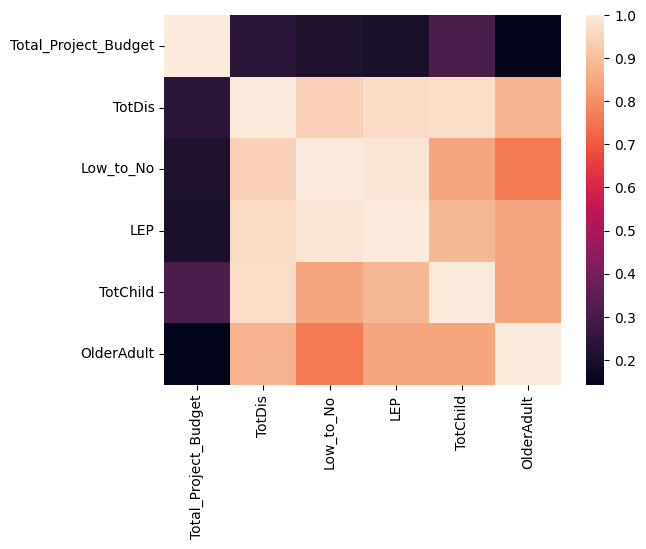

TotChild      0.310910
TotDis        0.238534
Low_to_No     0.207937
LEP           0.202076
OlderAdult    0.141965
Name: Total_Project_Budget, dtype: float64

In [25]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

data_wo_neighborhood = merged_data.drop(['Neighborhood'], axis=1)

# calculate the correlation matrix
corr = data_wo_neighborhood.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

# only show top row of correlatoin matrix with Total_project_budget
corr = corr.iloc[0]
corr = corr.drop(['Total_Project_Budget'])
corr = corr.sort_values(ascending=False)
corr

